# Desafio Indicium para Cientista de dados
<b>Nome:</b> Fábio Dias Rezende Carvalho </br>
<b>E-mail:</b> fabior.carvalho@hotmail.com </br>
O seguinte trabalho tem por objetivo avaliar minha capacidade técnica em resolução de problemas, analise e exploração de dados, assim como aplicação de modelo de machine learning.

## Desafio
Desenvolver uma plataforma de alugueis temporários na cidade de Nova York. O objetivo é desenvolver um modelo de previsão de preços, baseado no conjunto de dados descrito como 'teste_indicium_precificacao.csv', e avaliar o modelo utilizando as métricas de avaliação cabiveis ao problema.

#### Entregas
<ul>
  <li><b>Análise exploratória:</b> fazer uma análise exploratória dos dados demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas.</li>
  <li><b>Responder as seguintes perguntnas:</b> 
  <ul>
    <li>Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a
    compra?</li>
    <li>O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?</li>
    <li>Existe algum padrão no texto do nome do local para lugares de mais alto valor?</li>
  </ul></li>
  <li><b>Preço:</b> Como fazer a previsão do preço com base nos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</li>
  <li><b>Sugestão de preço:</b>Encontrar a sugestão de preço para um apartamento com as caracteristicas dadas.</li>
  <li><b>Modelo:</b>Deve ser entregue no formato '.pkl'.</li> 
</ul>

# Exploraçao de dados

In [187]:
import pandas as pd

dados = pd.read_csv('src/teste_indicium_precificacao.csv')
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [188]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Abaixo fiz pequenas consultas que deixarei comentado, mas elas fizeram a base para a tomada de decisões que vem na sequência.

In [189]:
#dados.query('nome.isnull()')
#dados.query('host_name.isnull()')
#38894/dados.shape[0]

Aqui observamos que existem valores nulos em algumas colunas. Nas colunas 'nome'(16 valores) e 'host_name'(21 valores) tem-se poucos valores nulos e a falta de nome, apesar de ser uma analise pedida na entrega, será mantida para preservar as informações nelas contidas.

Já as colunas 'ultima_review' e 'reviews_por_mes' possuem mais de 20% de valores nulos dentro dessas colunas, para não ter perda das informações das linhas referentes estou decidindo por remover ambas as colunas por completo.



In [190]:
dados = dados.drop(columns=['ultima_review', 'reviews_por_mes'])
dados.shape

(48894, 14)

## Comportamento e relação entre os dados

In [191]:
dados.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Aqui podemos observar alguns pontos relevantes dentro do nosso conjunto de dados.
* <b>price -</b> Aqui com o describe podemos observar que existe um valor de zero como minimo, o que ja afeta nosso conjunto de dados, e um valor máximo muito acima em relação ao 75% superior, o que também eleva o valor resultante da média, também influenciando no desvio padrão. Farei uma análise visual dos boxplots em sequência para confirmar os outliers e tomar decisoes mais precisas;
* <b>disponibilidade_365 -</b> Podemos observar que existem casas dentro do nosso dataset que não possui disponibilidade, isso é relevante de se observar para a pergunta <b>sobre considerar um investimento em uma casa em NY para alugar</b>, uma vez que considerando como um investimento o lucro máximo dessa casa vai se dar quando ela estiver ocupada em todos os dias do ano.
* <b>minimo_noites -</b> O dataset traz que a maior parte do nosso conjunto de dados possui alugueis de noites unicas, ou poucos dias em sequência, onde no 75% tem-se apenas 5 noite, e o máximo vai até 1250, ou seja, temos uma forte influencia do valor máximo e possiveis outiliers nessa coluna do nosso conjunto de dados.

In [192]:
#removendo as casas que possuem valor zero de aluguel
dados = dados.drop(dados[dados.price ==  0].index)

In [193]:
dados.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Os valores únicos de nome de regiões também serão analisados, uma vez que a <b>região do imóvel vai influenciar diretamente no preço desse imóvel, então também trabalharemos com análises mais detalhadas desse nosso fator no nosso conjunto de dados</b>.

# As perguntas que norteiam o projeto

## Investimento residencial
Considerando que uma pessoa busca investir em uma casa ela precisa focar em regiões que possuem menos dias disponiveis para aluguel, coluna denominada como 'disponibilidade_365', por que se tem menos dias disponiveis significa que ela esta ficando mais tempo alugada, o que representa maior retorno do investimento. O preço referente ao aluguel ela consegue definir com o modelo que será desenvolvido futuramente nesse arquivo. 

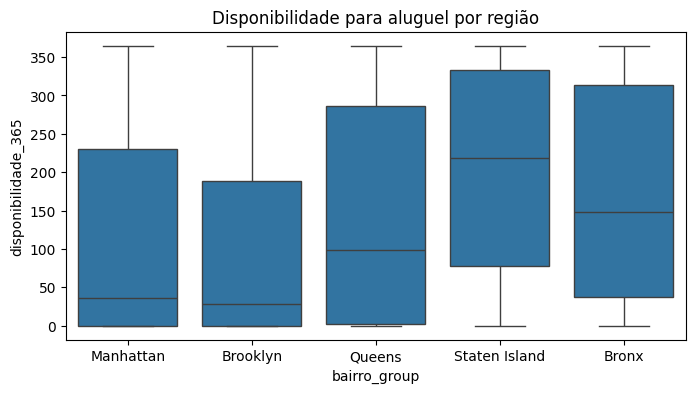

In [194]:
import seaborn as sns

boxplot = sns.boxplot(x='bairro_group', y='disponibilidade_365', data=dados)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Disponibilidade para aluguel por região');

Com o código acima separamos os grupos de regiões e podemos observar que a área de Manhattan e Brooklyn possuem menos dias disponiveis que os outros locais do nosso grupo, o que já indica que essas regiões possuem o mercado de aluguel mais aquecido e são a melhor pedida para um investimento de imóvel para alugar.<br>
Temos que o bairro do Brooklyn possue uma média de dias disponiveis um pouco mais baixa que Manhattan, mas vamos verificar numericamente esses valores do boxplot para ficar mais acertivo nessa afirmação de investimento.

In [195]:
dados_manhattan = dados.loc[dados['bairro_group'] == 'Manhattan']
dados_brooklyn = dados.loc[dados['bairro_group'] == 'Brooklyn']

dados_manhattan.describe()['disponibilidade_365']

count    21660.000000
mean       111.984580
std        132.678717
min          0.000000
25%          0.000000
50%         36.000000
75%        230.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

In [196]:
dados_brooklyn.describe()['disponibilidade_365']

count    20094.000000
mean       100.204141
std        126.269798
min          0.000000
25%          0.000000
50%         28.000000
75%        188.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

Aqui utilizamos o describe separadamente por região para demonstrar que os valores médios e quartis de disponibilidade dentro dos bairros apresenta uma indicação que a região do Brooklyn consegue ficar mais tempo ocupado que Manhattan, então a indicação seria de investimento em um imóvel no Brooklyn, mas um investimento em Manhattan também é uma boa opção baseada nas regiões e também considerando que a região de Manhattan possui imóveis com aluguel mais elevado, o que pode ser considerado na hora da escolha da compra do imóvel.

## Análise do número mínimo de noites e disponibilidade ao longo do ano
Para verificar a relação de preço com o número mínimo de noite e disponibilidade ao longo do ano vamos fazer uma análise gráfica dessas  variaveis do nosso grupo de dados referentes ao preço, além de uma matriz de correlação.

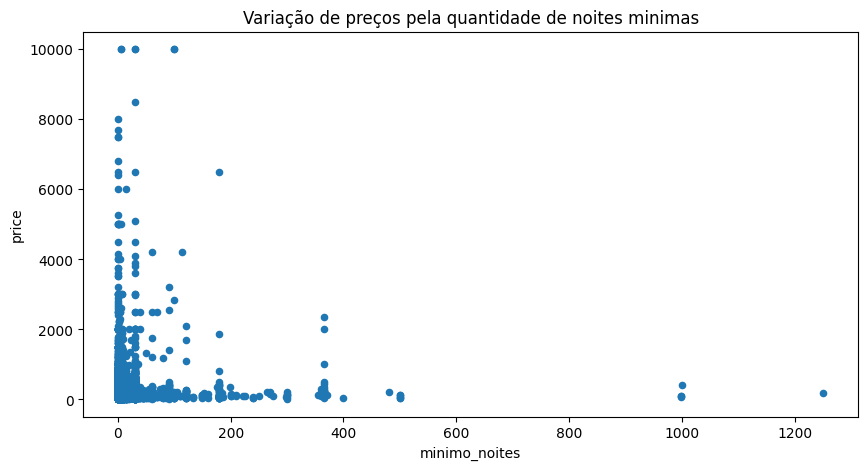

In [197]:
grafico = dados.plot.scatter(x='minimo_noites', y='price', figsize=(10,5))
grafico.set_title('Variação de preços pela quantidade de noites minimas');

Com o gráfico podemos observar que conforme o número de noites mininas aumenta o preço do aluguel cai. Importante frisar que já no nosso describe é perceptivel a presença de outliers dentro do nosso grupo de dados, mas isso ocorre também devido ao fato de termos outliers de noites minimas dentro do nosso grupo de dados.

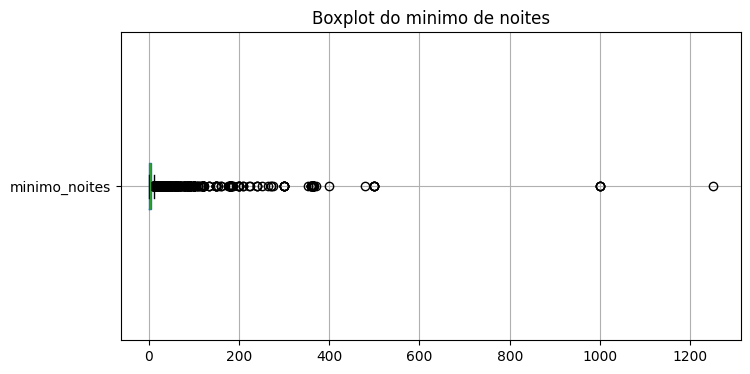

In [198]:
boxplot = dados.boxplot(column='minimo_noites',figsize=(6,4), vert=False)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Boxplot do minimo de noites');

Uma análise visual do nosso conjunto de dados com os valores mais próximos do nosso boxplot será interessante.

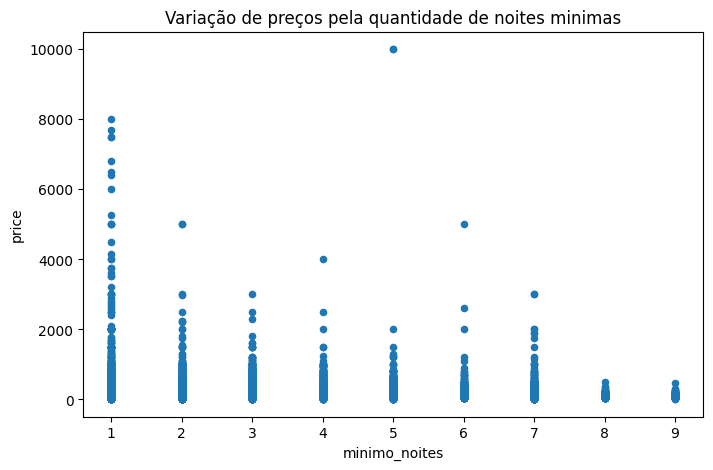

In [199]:
#definindo um filtro para auxiliar na visualização sem a grande quantidade de outliers
filtro = dados[dados['minimo_noites'] <  10]
grafico = filtro.plot.scatter(x='minimo_noites', y='price', figsize=(8,5))
grafico.set_title('Variação de preços pela quantidade de noites minimas');

Conforme nosso número minimo de noites aumenta existe uma queda dos preços dentro do noss grupo de dados.<br>
Agora vamos observar o comportamento do nosso conjunto de dados para a variação de preço com a disponibilidade durante o ano como um todo.

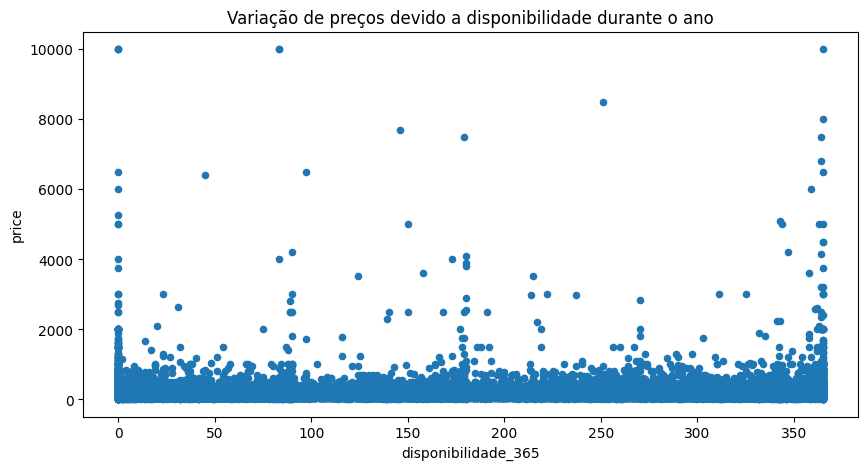

In [200]:
grafico = dados.plot.scatter(x='disponibilidade_365', y='price', figsize=(10,5));
grafico.set_title('Variação de preços devido a disponibilidade durante o ano');

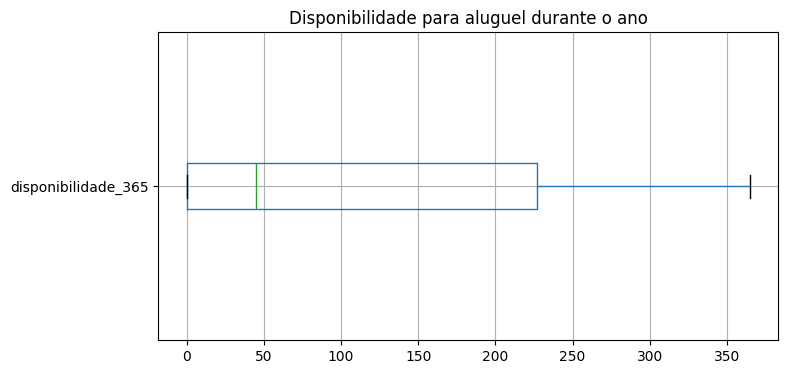

In [201]:
boxplot = dados.boxplot(column='disponibilidade_365',figsize=(6,4), vert=False)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Disponibilidade para aluguel durante o ano');

Vemos uma concentração grande de disponibilidade mais baixa dentro do nosso conjunto de dados, o que indica que boa parte do tempo as casas do nosso conjunto de dados está reservada.

In [202]:
# matriz de correlação.
dados[['price','minimo_noites','disponibilidade_365']].corr()

,price,minimo_noites,disponibilidade_365
price,1.000000,0.042805,0.081851
minimo_noites,0.042805,1.000000,0.144292
disponibilidade_365,0.081851,0.144292,1.000000


A matriz de correlação define a correlação entre os fatores nela indicado, variando de -1 a 1 dentro da matriz, onde -1 é um fator diretamente negativo (que influencia de forma negativa o valor de relação que está sendo observado) e +1 e um fator diretamente positvo (que influencia de forma diretamente positiva o valor que estamos observando), então em relação ao preço tem-se que a coluna 'minimo_noites' tem-se uma influencia de 0.042805 no preço e a cada dia disponivel dentro do ano tem-se o fator de 0.081851, logo <b>a disponibilidade durante o ano tem quase o dobro de influencia dentro do conjunto de dados em relação ao minimo de noites dentro do preço.</b></br>
Aqui vale ressaltar que o comportamente diz que valor diario cai, mas no total ele influencia no aumento de preço pois ele traz o numero de dias minimos apenas, tanto que na matriz de correlação temos um valor positivo, do contrario traria uma correlação negativa para o conjunto de dados.

## Padrões do nome do local com o preço
Agora vamos verificar se existe correlação direta entre o nome do local com o preço que ele possui. Para isso começaremos olhando os imóveis de maior valor do conjunto de dados.

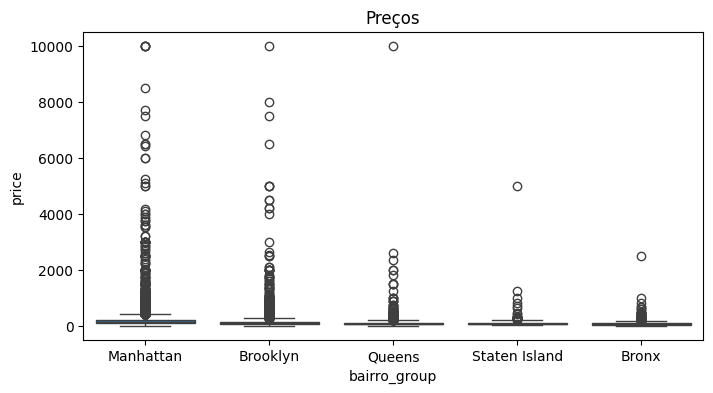

In [203]:
import seaborn as sns

boxplot = sns.boxplot(x='bairro_group', y='price', data=dados)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Preços');

Aqui já temos um fator importante que é a grande quantidade de outiliers dentro do nosso conjunto de preços, o que será tratado em breve nesse notebook. Mas vale ressaltar também os valores mais elevados nas regiões de Manhattan e Brooklyn, indicando que a afirmação anterior sobre a maior movimentação financeira no quesito imobiliario dentro desses bairros são maiores, fazendo com que o investimento nas regiões seja uma melhor opção.

In [204]:
#dados.query('price > 1000')

Efetuando uma 'query' pelo preço maior que 1000, considerando os imóveis mais caros, tem-se uma observação pela nomenclatura que carrega o termo apartamento, apt, ou loft. Abaixo eu vou verificar se isso realmente acontece com os nomes dos locais mais caros.

In [205]:
# filtrando apartamentos de alto valor, aqui considerei alto valor maior que 1000, mas pode ser mudado apenas alterando o valor abaixo no filtro
filtro_preco = dados.query('price > 1000')

#tornar a busca indiferente a letras maiusculas e minusculas
import re
filtro_nome = filtro_preco[filtro_preco.nome.str.contains('apartment|apt|loft', flags=re.IGNORECASE,  na=False)]

In [206]:
# quantidade de valores com preço acima de 1000
contador_preco = filtro_preco.nome.value_counts()

# quantidade de nomes que levam 'apartment', 'apt' ou 'loft'
contador_nomes = filtro_nome.nome.value_counts()

#calculando a porcentagem de aparições dentro do filtro
print('Dos imoveis acima de $1000, {}% levam essas palavras no nome'.format(round(len(contador_nomes)/len(contador_preco), 4)*100))

Dos imoveis acima de $1000, 24.79% levam essas palavras no nome


Então temos aqui que dentro dos imóveis de preço mais elevado encontramos que  aproximadamente 25% deles levam o nome de 'apartament', 'apt' ou 'loft', ou seja, 1/4 levam esse tipo de nome dentro do nosso conjunto de dados.   

# Trabalhando com a previsão do preço

Aqui eu trabalharei com a pressificação das casas além de descrever as tomadas de decisões e as motivações por trás destas.<br>
Como visto anteriormente tem-se uma distribuição de preço dos imóveis com bastante outliers dentro do nosso grupo de dados como um todo, tanto em análise total como em análise por região.

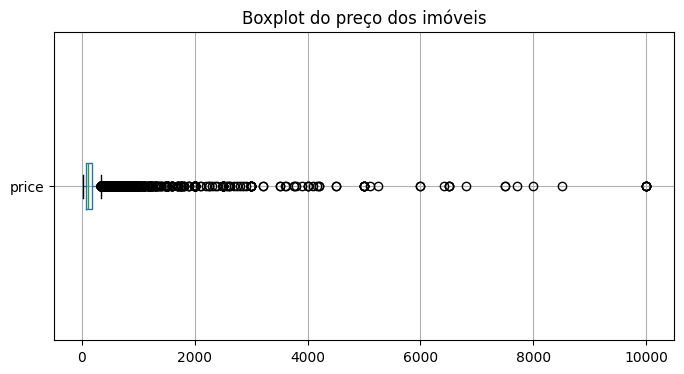

In [207]:
boxplot = dados.boxplot(column='price',figsize=(6,4), vert=False)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Boxplot do preço dos imóveis');

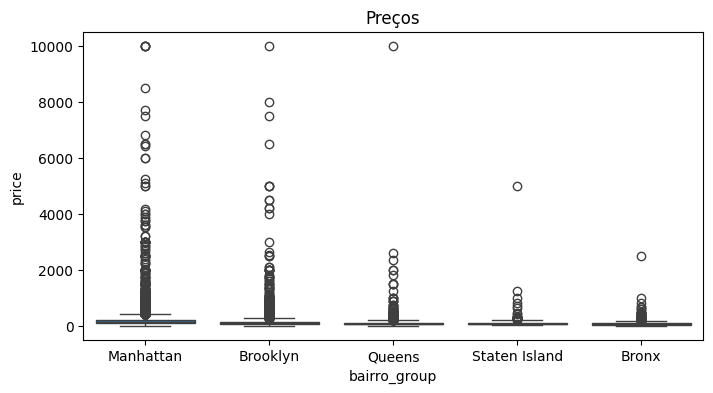

In [208]:
boxplot = sns.boxplot(x='bairro_group', y='price', data=dados)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Preços');

Então é necessario um tratamento adequado dos dados antes de tentarmos utilizar qualquer tipo de modelo preditivo no nosso conjunto de dados.<br>

## Trabalhando com os preços do conjunto de dados
A grande diferença desses dados definidos gera uma série de fatores negativos para nosso conjunto de dados, para trabalhar esse fator vamos modificar nossa variavel preço, então devemos <b>buscar uma distribuição normal, que permite maiores possibilidades para nosso conjunto de dados (teste estatiscos e a definição do modelo de machine learning possuem melhor precisão em dados com distribuição normal). Para nosso conjunto de dados vamos aplicar a transformação logaritmica </b>.

Importante também ressaltar que nosso problema aqui é um <b>problema de regressão, uma vez que queremos desenvolver um modelo de machine learning que nos possibilite encontrar um valor especifico para os imóveis baseando nos valores que temos dentro do nosso dataset.</b>

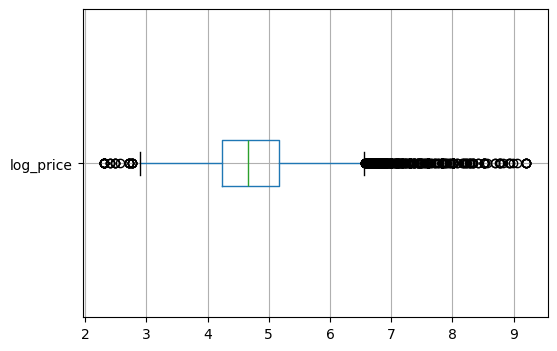

In [209]:
import numpy as np

dados['log_price'] = np.log(dados.price)

# Create the boxplot using the new 'log_price' column
boxplot = dados.boxplot(column='log_price', figsize=(6,4), vert=False)

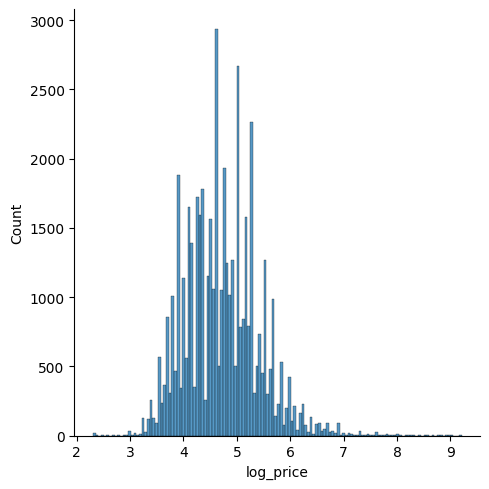

In [210]:
sns.displot(dados['log_price'])

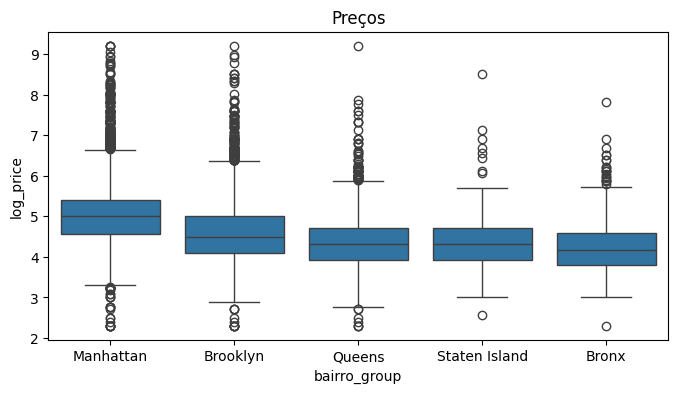

In [211]:
boxplot = sns.boxplot(x='bairro_group', y='log_price', data=dados)
boxplot.figure.set_size_inches(8,4)
boxplot.set_title('Preços');

### Definindo as variáveis do nosso modelo
Agora eu vou definir quais varáveis eu vou utilizar no meu modelo. Algumas eu ja irei remover para trabalhar melhor com o conjunto de dados, pois elas nao vao influenciar diretamente no meu modelo (estou considerando que existe uma possivel melhoria do modelo com a utilização da variavel bairro no meu grupo de dados, na seção final desse notebook eu vou descrever melhor isso).

In [212]:
dados = dados.drop(columns=['id', 'nome', 'host_id', 'host_name', 'bairro', 'latitude', 'longitude'])
dados.head()

,bairro_group,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,log_price
0,Manhattan,Entire home/apt,225,1,45,2,355,5.416100
1,Manhattan,Private room,150,3,0,1,365,5.010635
2,Brooklyn,Entire home/apt,89,1,270,1,194,4.488636
3,Manhattan,Entire home/apt,80,10,9,1,0,4.382027
4,Manhattan,Entire home/apt,200,3,74,1,129,5.298317


Agora que eu retirei essas colunas eu vou mudar meu conjunto de dados para um novo nome e trabalhar com o logaritmo nesse novo conjunto.</br>
Vale ressaltar a soma do valor 1 dentro do meu grupo de dados onde possui valor zero dentro da coluna, isso é feito para trabalharmos com o logaritmo em todas as colunas, pois se fosse passar o log do valor zero causaria um erro no código.

In [213]:
dados['log_minimo_noites'] = np.log(dados.minimo_noites)
dados['log_numero_de_reviews'] = np.log(dados.numero_de_reviews + 1)
dados['log_calculado_host_listings_count'] = np.log(dados.calculado_host_listings_count)
dados['log_disponibilidade_365'] = np.log(dados.disponibilidade_365 + 1)

dados_log = dados[['bairro_group','room_type','log_price', 'log_minimo_noites', 'log_numero_de_reviews',
                   'log_calculado_host_listings_count', 'log_disponibilidade_365']]
dados_log.head(2)

,bairro_group,room_type,log_price,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365
0,Manhattan,Entire home/apt,5.416100,0.000000,3.828641,0.693147,5.874931
1,Manhattan,Private room,5.010635,1.098612,0.000000,0.000000,5.902633


In [214]:
dados_log.shape

(48883, 7)

Agora eu preciso trabalhar duas colunas, 'bairro_group' e 'room_type', que estao como 'str' e passar elas para um formato que o computador consiga interpretar na hora de treinar meu modelo, no caso passar para valores numericos, uma vez que a maquina nao interpreta 'str'. 

In [215]:
dados_log.bairro_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [216]:
dados_log.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

#### OneHotEnconding x LabelEnconder
Podemos trabalhar com esses dois termos para aplicarmos a transformação do 'bairro_group' e do 'room_type', existem diversos prós e contras por trás dessa escolha e [esse link de referencia](https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b),  assim como [esse outro link](https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621), foram utilizados como base. </br>
Aqui estou optando por trabalhar com o OneHotEnconding, por que eu sei que Manhattan tem um preço maior que Brooklyn, e assim vai para as outras regiões, então para evitar introdução de vies e também evitar aplicar algum tipo de ordinalidade que não existe nesse conjunto de dados, eu vou escolher esse tipo, mas importante ressaltar que isso tem um custo computacional e também aumenta significativamente minha dimensionalidade no grupo de dados.

In [217]:
#aplicando onehotenconder com o get_dummies do pandas na coluna 'bairro_group'
dados_log = pd.get_dummies(dados_log, columns=['bairro_group'], dtype=int)

#aplicando onehotenconder com o get_dummies do pandas na coluna 'room_type'
dados_log = pd.get_dummies(dados_log, columns=['room_type'], dtype=int)

dados_log.head(2)

,log_price,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,5.416100,0.000000,3.828641,0.693147,5.874931,0,0,1,0,0,1,0,0
1,5.010635,1.098612,0.000000,0.000000,5.902633,0,0,1,0,0,0,1,0


In [218]:
#arrumando o nome das colunas que possuem espaço para nao ter problemas depois
dados_log.rename(columns={'bairro_group_Staten Island': 'bairro_group_Staten_Island'}, inplace=True)
dados_log.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'}, inplace=True)
dados_log.rename(columns={'room_type_Private room': 'room_type_Private_room'}, inplace=True)
dados_log.rename(columns={'room_type_Shared room': 'room_type_Shared_room'}, inplace=True)
dados_log.head(2)

,log_price,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room
0,5.416100,0.000000,3.828641,0.693147,5.874931,0,0,1,0,0,1,0,0
1,5.010635,1.098612,0.000000,0.000000,5.902633,0,0,1,0,0,0,1,0


In [219]:
dados_log.shape

(48883, 13)

Passamos de 7 atributos para 13 atributos, assim como esperado tivemos um aumento da dimensionalidade do nosso grupo de dados 'dados_log'.

### Criando a base de treino e de teste
Aqui vou definir a base de treino e de teste baseado no meu data set 'dados_log', lembrando que meu objetivo aqui é criar estimativa para o preço dos imóveis.

In [220]:
from sklearn.model_selection import train_test_split

y = dados_log.log_price

X = dados_log[['log_minimo_noites', 'log_numero_de_reviews', 'log_calculado_host_listings_count', 'log_disponibilidade_365', 
               'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan', 'bairro_group_Queens',
               'bairro_group_Staten_Island', 'room_type_Entire_home_apt', 'room_type_Private_room', 'room_type_Shared_room']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Aplicando o Statsmodel
Essa biblioteca é para aplicar estimações de diversos tipos de modelos estatisticos, assim como testes e exploração.

In [221]:
import statsmodels.api as sm

#aplicar a constante para o statmodels poder trabalhar seu parametro comparativo (intercepto na equação de regressao)
X_train_constante = sm.add_constant(X_train)

#hascont=true exige que seja passada o valor de constante 1 no modelo futuramente
modelo = sm.OLS(y_train, X_train_constante, hasconst=True).fit()


In [225]:
X_train_constante

,const,log_minimo_noites,log_numero_de_reviews,log_calculado_host_listings_count,log_disponibilidade_365,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten_Island,room_type_Entire_home_apt,room_type_Private_room,room_type_Shared_room
6002,1.0,0.693147,1.098612,0.000000,0.000000,0,0,1,0,0,1,0,0
30775,1.0,1.098612,2.708050,0.000000,5.123964,0,1,0,0,0,1,0,0
5198,1.0,0.693147,5.181784,0.000000,5.655992,0,0,1,0,0,0,1,0
18885,1.0,0.000000,2.708050,0.693147,5.521461,0,0,0,1,0,0,1,0
42374,1.0,1.098612,2.639057,0.693147,5.398163,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.0,1.098612,4.962845,0.693147,5.351858,0,0,1,0,0,0,1,0
44743,1.0,1.609438,1.386294,0.000000,4.787492,0,0,1,0,0,1,0,0
38169,1.0,1.098612,1.098612,0.000000,0.000000,0,0,0,1,0,1,0,0
860,1.0,1.098612,5.468060,0.693147,5.493061,0,1,0,0,0,1,0,0


In [222]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3493.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:29:11   Log-Likelihood:                -26658.
No. Observations:               36662   AIC:                         5.334e+04
Df Residuals:                   36651   BIC:                         5.343e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

A probabilidade que apresentamos na parte de F-estatistic é 0, se ele fosse maior que 0.05 deveriamos desconsiderar esse modelo, como é zero indica que <b>meu modelo é estatisticamente valido e consideravel</b>.<br>
Também temos o valor <b>R-squared, o nosso r², equivalente ao adj.R-squared, o que indica que é um modelo que leva em consideração todos as variaveis e elas contribuem para nosso modelo. Entretanto o R² leva o fator de aproximadamente 50%</b> apenas. Aqui também temos varias variáveis independentes entre si, mas o valor de R-squared pode ser afetado por outliers e deve ser interpretado cuidadosamente, pois o valor R² pode não estar ajustado corretamente, devido a presença dos outiliers que foram trabalhados anteriormente. <br>
Para os testes individuais dos nosso parâmetros temos um valor de 0.014 no 'log_calculado_host_listings_count', ainda passa no teste, sendo menor que 0.05.

Vale ressaltar alguns pontos relevantes da utilização desse modelo:
* Modelo mais simples:  definido com uma equação, onde expressa a relação entre as variaveis escolhidas, além de levar em consideração todas as variáveis que colocamos dentro do nosso dataset e todas elas terem valores relativamente consideraveis e devem ser utilizadas dentro da nossa previsão;
* Eficiente: ele é eficiente e calculado mais rapidos que outros modelo;
* Consideravemente bem difundido e estudado: um tipo de modelo de ml bem difundido e bem utilizado em ciencia de dados;

Pontos negativos:
* Outliers: apesar do tratamento dos outliers eles ainda podem prejudicar a estimativa, gerando forte impacto na reta de regressão;
* Dependencia de variaveis: ele pode assumir grande dependencia entre as variaveis;
* Variação: esse tipo de modelo define uma variação constante em torno da média;
* Quantidade de variaveis: temos uma quantidade consideravel de variaveis, onde pode afetar o modelo se fosse um conjunto de dados maior.

### A previsão de preço
Agora faremos a previsão com os dados no desafio e aplicaremos dentro do nosso conjunto de dados. Importante lembrar que fizemos a transformação logaritma para trabalhar com os outliers e termos uma curva próxima da normal, então é necessário retornar do log para encontrar um valor estimado verdadeiro.

In [223]:
constante = 1
minimo_noites = 1
numero_de_reviews = 45
calculado_host_listings_count = 2
disponibilidade_365 = 355
bairro_group_Bronx = 0
bairro_group_Brooklyn = 0
bairro_group_Manhattan = 1
bairro_group_Queens = 0
bairro_group_Staten_Island = 0
room_type_Entire_home_apt = 1
room_type_Private_room = 0
room_type_Shared_room = 0

entrada = [[constante, np.log(minimo_noites), np.log(numero_de_reviews), np.log(calculado_host_listings_count), np.log(disponibilidade_365),
            bairro_group_Bronx, bairro_group_Brooklyn, bairro_group_Manhattan, bairro_group_Queens, bairro_group_Staten_Island, 
            room_type_Entire_home_apt, room_type_Private_room, room_type_Shared_room]]

print('O valor estimado para o imóvel disponibilizado no desafio é de ${:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

O valor estimado para o imóvel disponibilizado no desafio é de $235.41


A previsão do valor do imóvel dentro do nosso conjunto de dados é de <b>$235.41.</b><br>
Vale ressaltar a necessidade de colocar a constante de valor 1 por termos colocado a constante comparativa para nosso modelo, citada acima.

## Salvando o modelo
Aqui vamos salvar o nosso modelo no formato 'pkl' para poder aplica-lo futuramente.

In [231]:
import pickle

saida = open('modelo_fabio_dias.pkl', 'wb')
pickle.dump(modelo, saida)
saida.close()

# Agradecimentos e considerações finais
Gostaria de agradecer a empresa Indicium pela oportunidade e pelo desafio, foram muitas horas investidas nesse projeto que me orgulho de ter desenvolvido e que trouxe muito aprendizado que utilizarei em minha carreira. Fico muito feliz pelo trabalho realizado, mas também gostaria de ter mais tempo para continuar melhorando tudo aquilo que foi desenvolvido aqui, fico com a sensação de trabalho concluido, mas também a sensação de poder fazer ainda mais. </br>
Enquanto eu revisava tudo o que foi desenvolvido eu pensei em várias possiveis melhorias e novas análises que eu consideraria fazer, principalmente pensando se estivesse fazendo um trabalho real em uma empresa quais pontos eu iria consultar com pessoas mais experientes que eu, então vou listar aqui os pontos que achei relevante e que caberiam revisão, considero que são pontos que poderia melhorar futuramente nesse projeto.
* T-test das regiões do Brooklyn e de Manhattan, uma vez que era cabivel aplicar esse teste estatistico para verificar a diferença dos valores residênciais dessas regiões;
* Conferir a quantidade de noites minimas, otuliers e a matriz de correlação dos outros fatores dentro do meu conjunto de dados;
* Acredito que uma possivel separação das regiões e uma análise especifica dos bairros dentro dessa região poderia trazer mais precisão para a afirmação de preços das casas e um modelo com melhor predição, entretanto dentro do conjunto de dados são mais de 200 bairros diferentes e eu não consegui pensar em caminhos a seguir para fazer essa analise e nem se ela valeria o tempo investido, uma vez que tenho a limitação de tempo desse projeto;
* Aplicação do labelEnconder e comparação com a previsão dos resultados do oneHotEncode, gostaria de mais tempo para trabalhar unica e exclusivamente nessa comparação, pois minha escolha foi baseada apenas nas referências e na base de dados que eu tinha, nao consegui verificar se geraria uma ordinalidade nos dados e achei essa hipotese muito interessante e que pode ser aplicada em casos especificos.

No mais eu fico ansioso pelo retorno da empresa, li boa parte do site e achei impressionante o que vocês construiram e como trabalham, além das diversas premiações pelo bom trabalho que a empresa consegue desenvolver.